Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 5.45E+02
	diameter = 1.0E-01, distance = 1.94E+01
	diameter = 1.0E-02, distance = 2.04E+00
	diameter = 1.0E-03, distance = 2.04E-01
Done!


Slope:1.1259541443421452 intercept:2.5998345693201728


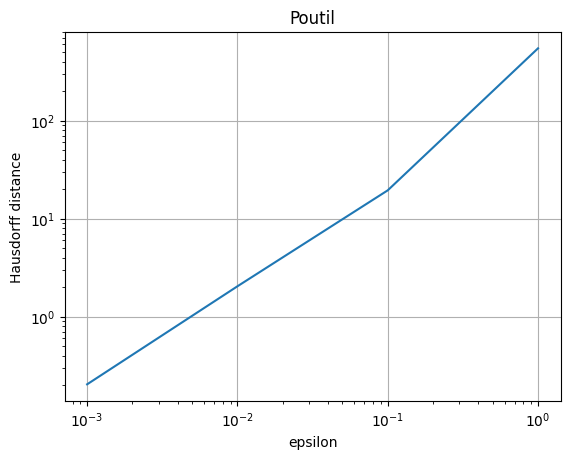

Poutil executed


In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from pyomo.opt import SolverFactory, TerminationCondition
from src.analyses.value_function import ValueFunction
from src.analyses.convergence_analysis import HausdorffAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
from scipy.optimize import curve_fit
def get_critical_width(alg,y_optimal,k=1,abs_epsilon=0.01):
    haus=HausdorffAnalyzer(alg)
    print(f"width: {abs_epsilon/k}")
    print(haus._gen_interval(y_optimal,abs_epsilon/k))
def linear_func(x, a, b):
        return a * x + b
def convergence_analysis(alg,fixed_pt,optimal_sol,start=-5,stop=0,steps=6,name="instance"):

    haus=HausdorffAnalyzer(alg)
    eps_list, distances=haus.analyze(y=fixed_pt, v=optimal_sol,
                    eps_min= start, eps_max = stop, steps= steps,
                    y_optimal= True)
    log_eps = np.log10(eps_list)
    log_distances = np.log10(distances)

    # Perform curve fitting
    params, _ = curve_fit(linear_func, log_eps, log_distances)
    print(f"Slope:{params[0]} intercept:{params[1]}")
    plt.loglog(eps_list, distances)
    plt.grid()
    plt.xticks(np.logspace(start, stop, steps))
    plt.xlabel("epsilon")
    plt.ylabel("Hausdorff distance")
    plt.title(name)
    plt.show()
from NSPLIB.src.instances.poutil.poutil_SP import const_model
poutil_obj = 266187.5332404778  # Replace with actual value
poutil_sol = {'alpha': 74.94473247856709, 'beta': 9.000000000000028}  # Replace with actual solution values
poutil_y_bound = {'alpha': [0.0, 470], 'beta': [0.0, 470]}  # Replace with actual bounds
sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
alg=LagrangeanAlgo(m,solver="baron",lag_iter=20)
convergence_analysis(alg,poutil_sol,poutil_obj,
                    start=-3,stop=0,steps=4,name="Poutil")
print("Poutil executed")